In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data from the Excel file
file_path = "C:\\Users\\AT\\Downloads\\Input.xlsx"
data = pd.read_excel(file_path)

# Display the first few rows of the dataset and the columns
data.head(), data.columns

(         Day     Mood     Activity-1         Activity-2
 0     Monday      Sad           Work     Heavy Workload
 1    Tuesday      Sad  Relationships           Argument
 2  Wednesday   Lonely        Routine     Daily Monotony
 3   Thursday  Neutral        Routine     Daily Monotony
 4     Friday    Happy        Leisure  Friends Gathering,
 Index(['Day', 'Mood', 'Activity-1', 'Activity-2'], dtype='object'))

In [4]:
# Set random seed for reproducibility
np.random.seed(0)

# Define the number of entries (same as existing data)
num_entries = len(data)

In [5]:
# Generate additional data
data['Time of Day'] = np.random.choice(['Morning', 'Afternoon', 'Evening'], size=num_entries)
data['Weather'] = np.random.choice(['Sunny', 'Cloudy', 'Rainy', 'Snowy'], size=num_entries)
data['Sleep Hours'] = np.random.choice(range(4, 10), size=num_entries)  # Sleep hours between 4 and 9
data['Diet'] = np.random.choice(['Balanced', 'Unhealthy', 'Skipped Meals', 'Overeating'], size=num_entries)
data['Exercise'] = np.random.choice(['None', 'Light', 'Moderate', 'Intense'], size=num_entries)
data['Social Interactions'] = np.random.choice(range(0, 10), size=num_entries)  # Number of interactions

# Display the updated dataset
data.head()

,Day,Mood,Activity-1,Activity-2,Time of Day,Weather,Sleep Hours,Diet,Exercise,Social Interactions
0,Monday,Sad,Work,Heavy Workload,Morning,Snowy,9,Unhealthy,Light,8
1,Tuesday,Sad,Relationships,Argument,Afternoon,Sunny,9,Skipped Meals,Moderate,4
2,Wednesday,Lonely,Routine,Daily Monotony,Morning,Rainy,4,Overeating,Intense,6
3,Thursday,Neutral,Routine,Daily Monotony,Afternoon,Rainy,4,Overeating,Moderate,9
4,Friday,Happy,Leisure,Friends Gathering,Afternoon,Snowy,5,Unhealthy,Light,3


In [6]:
# Function to generate random variations for the existing rows
def augment_data(row, num_copies):
    variations = []
    for _ in range(num_copies):
        new_row = row.copy()
        new_row['Time of Day'] = np.random.choice(['Morning', 'Afternoon', 'Evening'])
        new_row['Weather'] = np.random.choice(['Sunny', 'Cloudy', 'Rainy', 'Snowy'])
        new_row['Sleep Hours'] = np.random.choice(range(4, 10))
        new_row['Diet'] = np.random.choice(['Balanced', 'Unhealthy', 'Skipped Meals', 'Overeating'])
        new_row['Exercise'] = np.random.choice(['None', 'Light', 'Moderate', 'Intense'])
        new_row['Social Interactions'] = np.random.choice(range(0, 10))
        variations.append(new_row)
    return variations

# Number of copies for each row
num_copies = 20

# Generate the augmented data
augmented_data = pd.concat([pd.DataFrame(augment_data(row, num_copies)) for _, row in data.iterrows()], ignore_index=True)

# Display the size of the new dataset and the first few rows
augmented_data.shape, augmented_data.head()

((2100, 10),
       Day Mood Activity-1      Activity-2 Time of Day Weather  Sleep Hours  \
 0  Monday  Sad       Work  Heavy Workload     Morning  Cloudy            5   
 1  Monday  Sad       Work  Heavy Workload     Evening   Sunny            9   
 2  Monday  Sad       Work  Heavy Workload   Afternoon   Sunny            4   
 3  Monday  Sad       Work  Heavy Workload     Morning   Snowy            9   
 4  Monday  Sad       Work  Heavy Workload     Morning  Cloudy            4   
 
             Diet  Exercise  Social Interactions  
 0  Skipped Meals  Moderate                    5  
 1  Skipped Meals      None                    2  
 2      Unhealthy      None                    2  
 3  Skipped Meals      None                    8  
 4      Unhealthy      None                    2  )

In [7]:
# Save the augmented data to a new Excel file
augmented_file_path = 'C:\\Users\\AT\\Downloads\\Augmented_Input.xlsx'
augmented_data.to_excel(augmented_file_path, index=False)

augmented_file_path

'C:\\Users\\AT\\Downloads\\Augmented_Input.xlsx'

In [8]:
### we do not have any unentered or missing fields currently, however if a users leave fields empty: 

In [18]:
#Identify and Drop missing values if the dataset is large enough and the missing data is not significant
# data.isnull().sum()
# data.dropna(inplace=True)

# #For numerical data like 'Sleep Hours', fill with the mean or median and for categorical data like 'Mood', use the mode or a placeholder like 'Unknown'
# data['Sleep Hours'].fillna(data['Sleep Hours'].median(), inplace=True)
# data['Mood'].fillna('Unknown', inplace=True)

#Ensuring that the missing values are handled by checking again  
data.isnull().sum() 

# Load your data
data = pd.read_excel('C:\\Users\\AT\\Downloads\\Augmented_Input.xlsx')  

data = data[data['Mood'] != 'Routine']

#### We ensured no field is blank

### I have framed few questions that would drive insightful information out of the data:

1. **How does mood vary by day of the week?**  
   To determine if there are certain days when users generally feel better or worse.

2. **What impact does the weather have on mood?**  
   Analyzing mood variations with different weather conditions like sunny, rainy, etc.

3. **Is there a correlation between sleep hours and mood?**  
   Understanding if a lack of sleep correlates with negative moods or not.

4. **Does the type of diet correlate with mood?**  
   Investigating if dietary choices (balanced, unhealthy, etc.) affect users' moods.

5. **What are the common activities associated with positive and negative moods?**  
   Identifying activities that often lead to happiness or sadness.

6. **How does the time of day affect mood?** <br>
   Examining mood fluctuations throughout the day (morning, afternoon, evening).

7. **What is the effect of social interactions on mood?** <br>
   Analyzing how social interactions contribute to mood swings.

8. **Is there any effect of diet on sleep?** <br>
    Can a good diet contribute to better sleep or not.

9. **How does mood variation correlate with combined factors like diet and exercise?** <br>
    Examining the combined effect of multiple lifestyle factors on mood.


### 1. How does mood vary by day of the week?

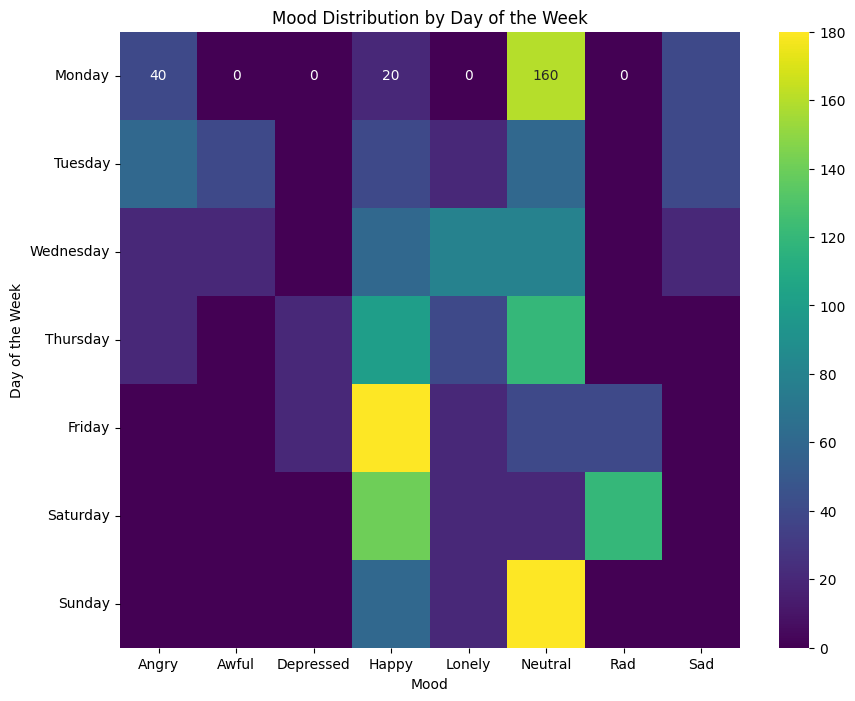

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the days of the week are in the correct order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['Day'] = pd.Categorical(data['Day'], categories=days_order, ordered=True)

# Group data by 'Day' and 'Mood' and count occurrences, explicitly setting observed=True
mood_by_day = data.groupby(['Day', 'Mood'], observed=True).size().unstack(fill_value=0)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(mood_by_day, annot=True, cmap='viridis', fmt='d')
plt.title('Mood Distribution by Day of the Week')
plt.xlabel('Mood')
plt.ylabel('Day of the Week')
plt.yticks(rotation=0)  
plt.show()

### 2. What impact does the weather have on mood?

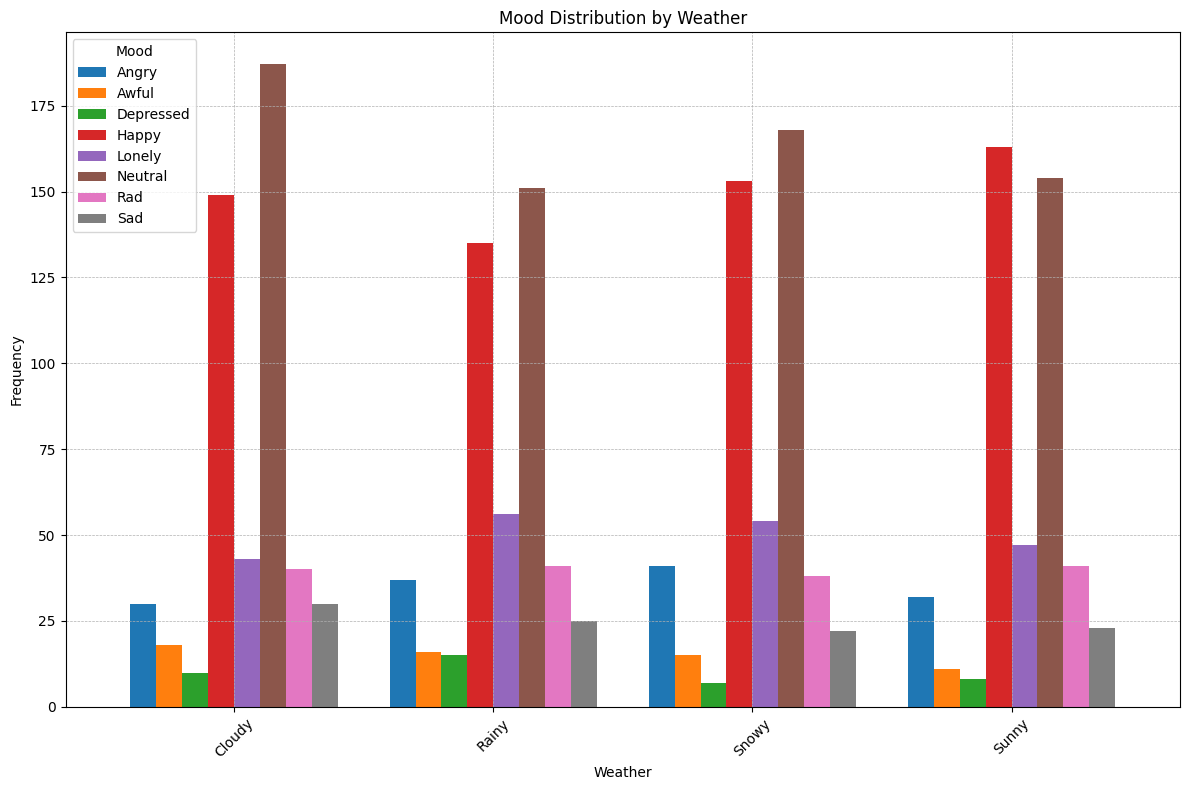

In [20]:
# Group data by 'Weather' and 'Mood' and count occurrence
mood_by_weather = data.groupby(['Weather', 'Mood'], observed=True).size().unstack(fill_value=0)

# Create a grouped bar chart
mood_by_weather.plot(kind='bar', figsize=(12, 8), width=0.8)
plt.title('Mood Distribution by Weather')
plt.xlabel('Weather')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate the weather labels for better readability
plt.legend(title='Mood')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### 3. Is there a correlation between sleep hours and mood?

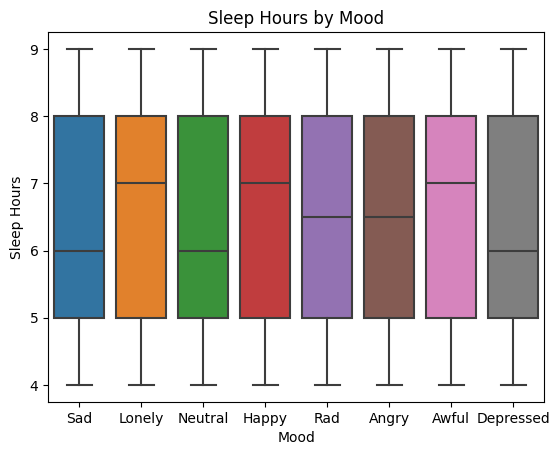

In [22]:
sns.boxplot(x='Mood', y='Sleep Hours', data=data)
plt.title('Sleep Hours by Mood')
plt.xlabel('Mood')
plt.ylabel('Sleep Hours')
plt.show()

### 4. Does the type of diet correlate with mood?

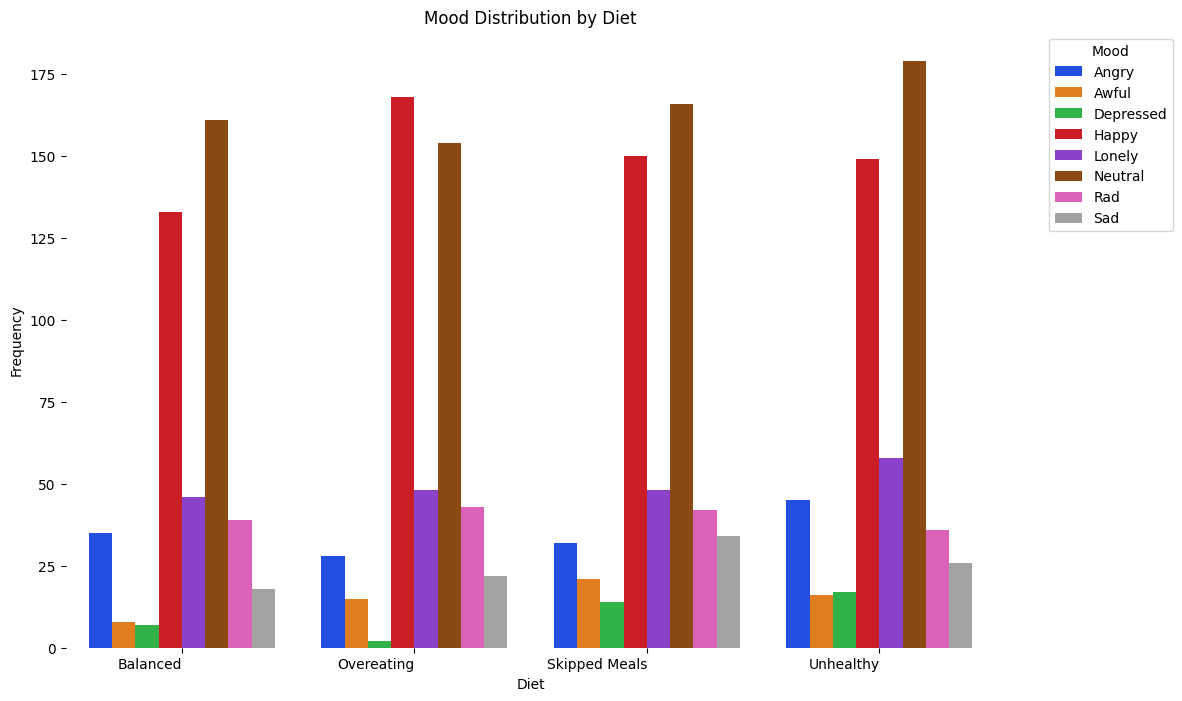

In [36]:
# Group data by 'Diet' and 'Mood' and count occurrences
mood_by_diet = data.groupby(['Diet', 'Mood']).size().reset_index(name='Count')

# Create a clustered bar chart using seaborn
plt.figure(figsize=(12, 8))
chart = sns.barplot(x='Diet', y='Count', hue='Mood', data=mood_by_diet, palette='bright')
plt.title('Mood Distribution by Diet')
plt.xlabel('Diet')
plt.ylabel('Frequency')
plt.legend(title='Mood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Rotate diet labels for better readability
sns.despine(left=True, bottom=True)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0 , horizontalalignment='right')

plt.show()

### 5. What are the common activities associated with positive and negative moods?

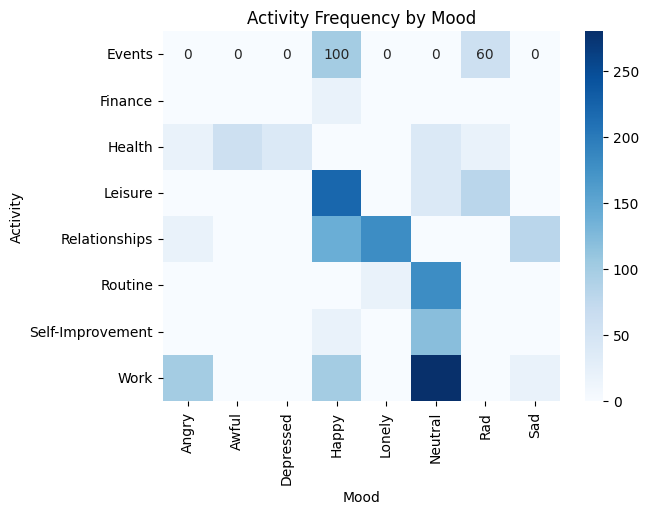

In [37]:
activity_by_mood = data.groupby(['Activity-1', 'Mood']).size().unstack(fill_value=0)
sns.heatmap(activity_by_mood, annot=True, fmt="d", cmap='Blues')
plt.title('Activity Frequency by Mood')
plt.xlabel('Mood')
plt.ylabel('Activity')
plt.show()

### 6. How does the time of day affect mood?

<Figure size 1200x800 with 0 Axes>

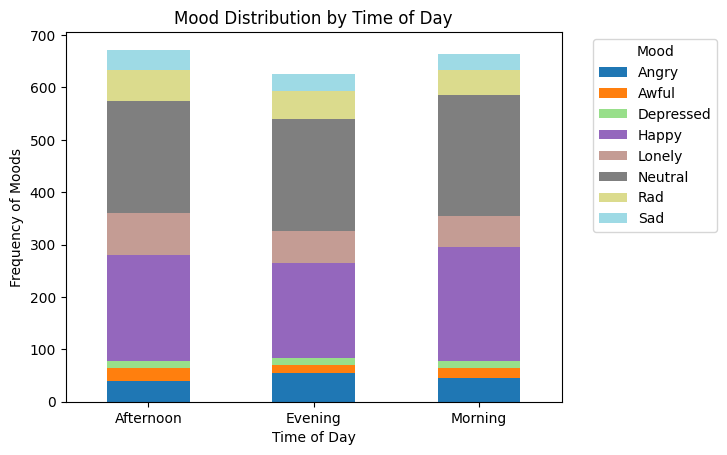

In [47]:
# Group data by 'Time of Day' and 'Mood' and count occurrences
mood_by_time = data.groupby(['Time of Day', 'Mood']).size().unstack(fill_value=0)

# Create a stacked bar chart
plt.figure(figsize=(12, 8))
mood_by_time.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Mood Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Frequency of Moods')
plt.xticks(rotation=0) 
plt.legend(title='Mood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 7. What is the effect of social interactions on mood?

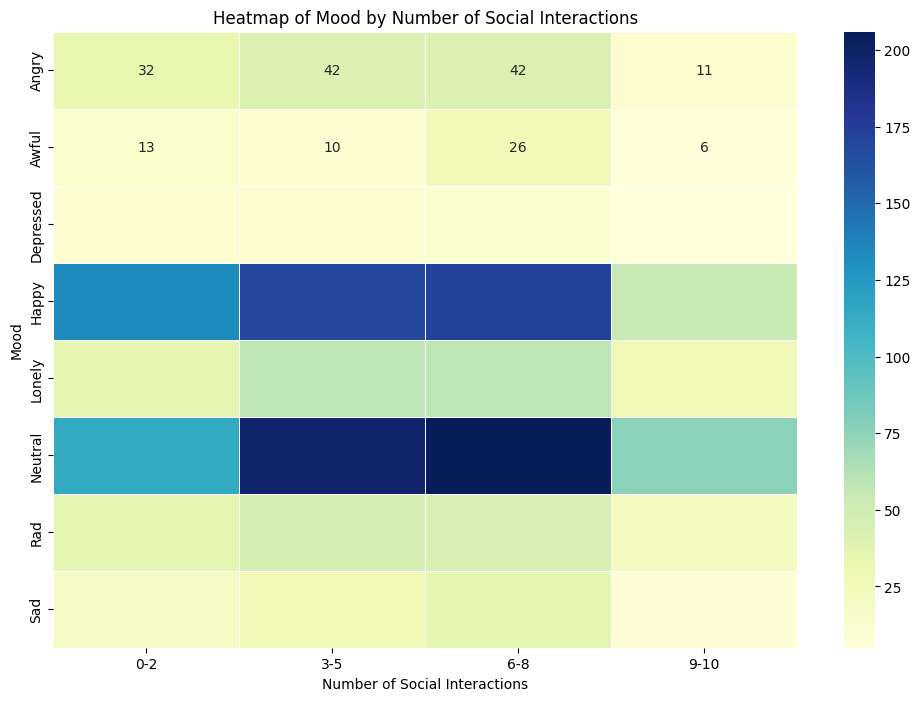

In [106]:
pivot_table = pd.pivot_table(data, values='Day', index='Mood', columns='Social Interactions', aggfunc='count', fill_value=0, observed=True)

# heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d', linewidths=.5)
plt.title('Heatmap of Mood by Number of Social Interactions')
plt.xlabel('Number of Social Interactions')
plt.ylabel('Mood')
plt.show()

### 8. Is there any effect of diet on sleep? 

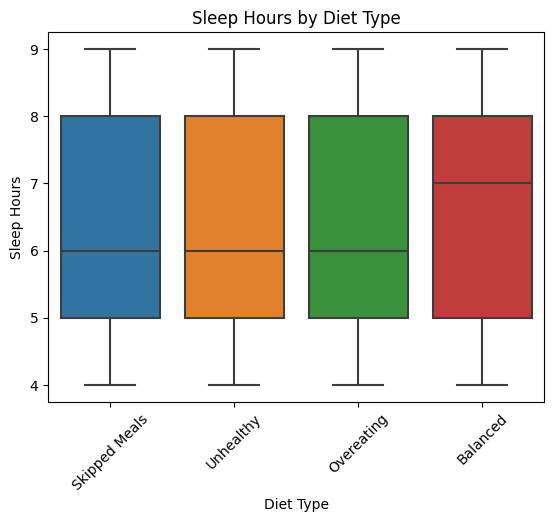

In [85]:
sns.boxplot(x='Diet', y='Sleep Hours', data=data)
plt.title('Sleep Hours by Diet Type')
plt.xlabel('Diet Type')
plt.ylabel('Sleep Hours')
plt.xticks(rotation=45) 
plt.show()

### 9. How does mood variation correlate with combined factors like diet and exercise?

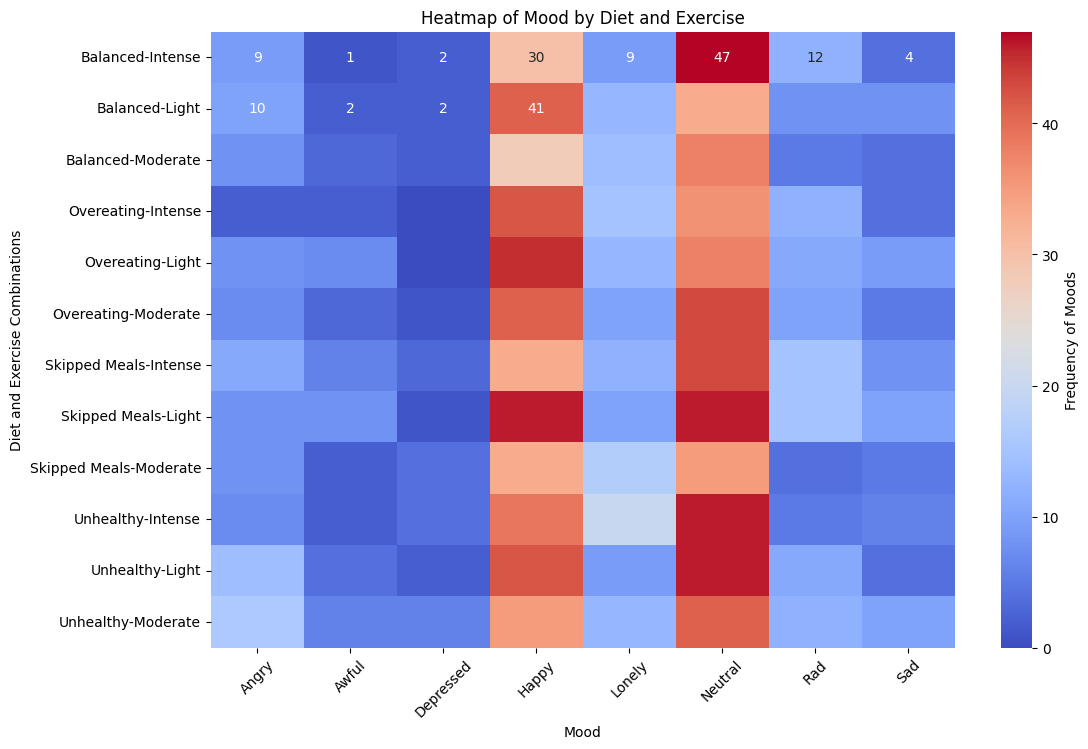

In [87]:
# Create a pivot table with 'Diet' and 'Exercise' as rows and 'Mood' as columns
pivot_table = pd.pivot_table(data, values='Day', index=['Diet', 'Exercise'], columns='Mood', aggfunc='count', fill_value=0)

# heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', cbar_kws={'label': 'Frequency of Moods'})
plt.title('Heatmap of Mood by Diet and Exercise')
plt.xlabel('Mood')
plt.ylabel('Diet and Exercise Combinations')
plt.xticks(rotation=45)  SS
plt.show()

###### Alekh Taori, 202000423, CSE